# Voyage Version 1.0

## What is Voyage?

[Voyage](https://huggingface.co/openvoyage/voyage-v1) is basically a _text to image_ model developed by [Muhammadreza Haghiri](https://haghiri75.com) and it is based on weights from Stable Diffusion version 2.0 and Midjourney version 4. This model helps creative people turn their ideas to artwork for free (in any sense of the word _free_). 

## The ownership of the generated content

Since you use this notebook on your own Google account and you spend your own time on it, I guess the total owner of that content is no one but you (a poetic interpretation of the sentence _You're the owner of the content_, eh?) but I personally ask you to just introduce _Voyage_ to your friends and family members and help AI content creation spread in the world. 

## How to use this notebook?

Just run cells, if anything needs to be modified, there will be a guide. 

In [ ]:
#@markdown # Checking the GPU

!nvidia-smi

In [ ]:
#@markdown # Installing required libraries

!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers scipy ftfy accelerate

In [3]:
#@markdown # Importing necessary libraries

from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, DiffusionPipeline, DPMSolverMultistepScheduler
import torch

In [ ]:
#@markdown # Setting up the model
#@markdown Please note that the model has its own default settings here, there will be an option for further modifications as well. The current code works perfectly and very nice results are generated with these settings, specially with the `euler` scheduler.

model_id = "openvoyage/voyage-v1"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

In [8]:
#@markdown # Inference properties
#@markdown Currently, the _guidance scale_ isn't modifiable (is that actually a word?) by user. But prompt, negative prompt and dimensions are. Although this model can output 768x768 pictures, but we recommend having 512x512 for better results. And if you just want to modify the code to get another value for the guidance scale, don't increase it more than 10 (which is the default value) because it may make your image fuzzy and distorted.



prompt = "ultra realistic illustration of a young beautiful woman, intricate, elegant, sharp focus, smooth edges" #@param {type: "string"}
negative_prompt = "hands, arms, ribs" #@param {type: "string"}
width = 512 #@param {type: "number"}
height = 512 #@param {type: "number"}


prompt = f"<voyage> style {prompt}"

prompt is <voyage> style ultra realistic illustration of a young beautiful woman, intricate, elegant, sharp focus, smooth edges


  0%|          | 0/75 [00:00<?, ?it/s]

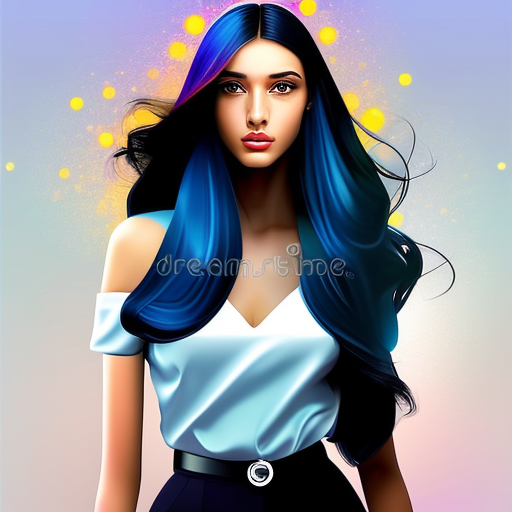

In [9]:
#@markdown # Run the generator
print(f'prompt is {prompt}')
image = pipe(prompt=prompt, negative_prompt=negative_prompt, num_inference_steps=75, width=512, height=512, guidance_scale=10).images[0]
image